In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from NN_module.neural_network import NN
from NN_module.layers import Dense

In [3]:
%load_ext autoreload
%autoreload 2

## Regression
to test the regression capabilities of this neural network we will fit a NN into a sine plot

In [4]:
sin_x = np.array(np.linspace(0,12.28,100,dtype=float),ndmin=2).T
sin_y = np.array(np.sin(sin_x),ndmin=2)

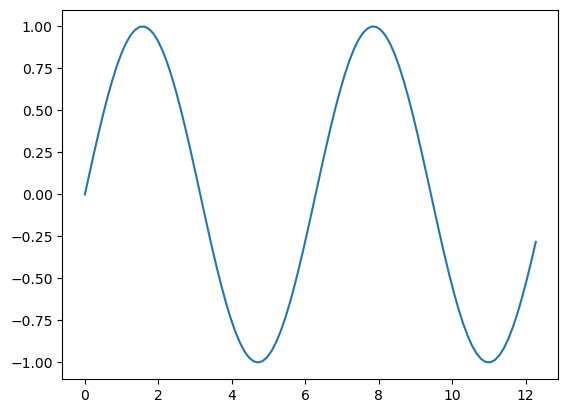

In [5]:
plt.plot(sin_x, sin_y)
plt.show()

In order to fit this data of cosine we will implement the neural network with the loss function of mse 'Mean squared error'.

In [6]:
model_sin_reg = NN([ Dense(units = 128 ,activation = 'relu'), 
                    Dense(units = 128, activation = 'relu'),
                    Dense(units = 1, activation = 'linear')],
                    loss = 'mean_squared_error',)

In [7]:
model_sin_reg.fit(sin_x,sin_y, epochs=5000, batch_size=-1, optimizer='adam', learning_rate=0.001, decay=0.0001,momentum=0.1, get_log=True)

epoch: 0 loss: 0.506

epoch: 500 loss: 0.043

epoch: 1000 loss: 0.001

epoch: 1500 loss: 0.000

epoch: 2000 loss: 0.000

epoch: 2500 loss: 0.000

epoch: 3000 loss: 0.000

epoch: 3500 loss: 0.000

epoch: 4000 loss: 0.000

epoch: 4500 loss: 0.000



In [8]:
sin_y_predict = model_sin_reg.predict(sin_x)

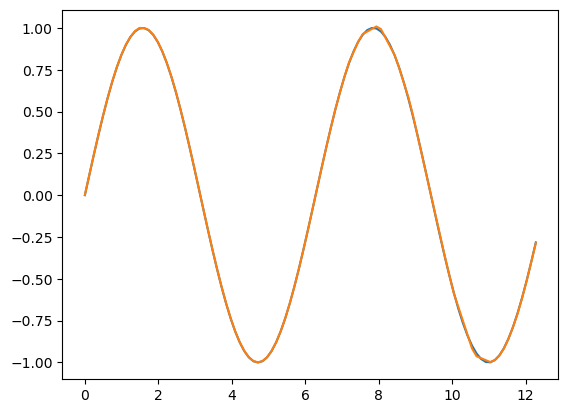

In [9]:
plt.plot(sin_x, sin_y)
plt.plot(sin_x, sin_y_predict)
plt.show()

The curve fits quite well , the adam optimizer converges really fast making the learning process very fast.

## Classification
we will be testing the nueral network for classification purposes.

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("./test_data/spiral.csv")
df.head()

,X,Y,Group
0,31.15,7.30,3
1,30.45,6.65,3
2,29.70,6.00,3
3,28.90,5.55,3
4,28.05,5.00,3


In [12]:
#creating one hot vector for the classification
df.insert(3 , "cat1" ,0)
df.insert(4 , "cat2" , 0)
df.insert(5 , "cat3" , 0)
df['cat1'] = np.where(df['Group'] == 1, 1, df['cat1'])
df['cat2'] = np.where(df['Group'] == 2, 1, df['cat2'])
df['cat3'] = np.where(df['Group'] == 3, 1, df['cat3'])
df.tail()

,X,Y,Group,cat1,cat2,cat3
306,15.75,13.85,2,0,1,0
307,15.65,14.05,2,0,1,0
308,15.65,14.25,2,0,1,0
309,15.65,14.50,2,0,1,0
310,15.65,14.60,2,0,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

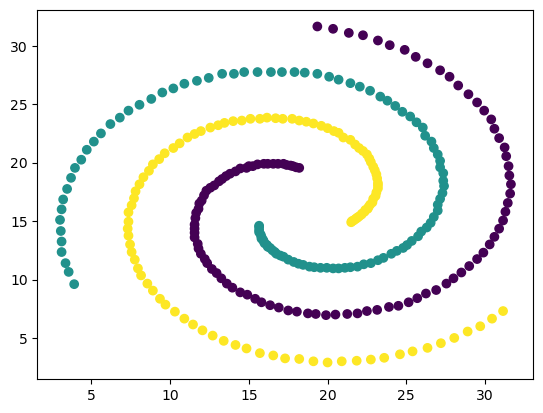

In [13]:
data = df.to_numpy()
plt.scatter(x=data[:,0] , y=data[:,1] , c=data[:,2]);
plt.show

In [14]:
X_spiral = data[:,0:2]
Y_spiral = data[:,3:6]
print("X dimensions :- " ,X_spiral.shape)
print("Y dimensions :- " ,Y_spiral.shape)

X dimensions :-  (311, 2)
Y dimensions :-  (311, 3)


In [15]:
#creating model
model_spiral = NN([ Dense(units = 128 ,activation = 'relu'),
                    Dense(units = 128, activation = 'relu'),
                    Dense(units = 3, activation = 'softmax')],
                    loss = 'categorical_crossentropy',)

In [16]:
model_spiral.fit(X_spiral,Y_spiral, epochs=3000, optimizer='adam', batch_size=-1 , learning_rate=0.002, decay=0.0001,momentum=0.02, get_log=True)

epoch: 0 loss: 1.099

epoch: 300 loss: 0.647

epoch: 600 loss: 0.425

epoch: 900 loss: 0.140

epoch: 1200 loss: 0.016

epoch: 1500 loss: 0.002

epoch: 1800 loss: 0.000

epoch: 2100 loss: 0.000

epoch: 2400 loss: 0.000

epoch: 2700 loss: 0.000



In [17]:
#testing the model
#let's create an array containing all points in the range of (0,0) to (35,35)
x_coords = np.arange(0, 40, 0.25)
y_coords = np.arange(0, 40, 0.25)

# creating all combinations
xv, yv = np.meshgrid(x_coords, y_coords)
    
# Stack and transpose
X_spiral_test = np.stack((xv, yv), axis=-1).reshape(-1, 2)

print(X_spiral_test.shape)

(25600, 2)


In [18]:
Y_spiral_test = model_spiral.predict(X_spiral_test)
print(Y_spiral_test.shape)
#print(Y_spiral_test[:10,:])

(25600, 3)


In [19]:
Y_spiral_predict = np.argmax(Y_spiral_test , axis = 1)
Y_spiral_predict += 1 # as original mappint is {1,2,3}
Y_spiral_predict[:10]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

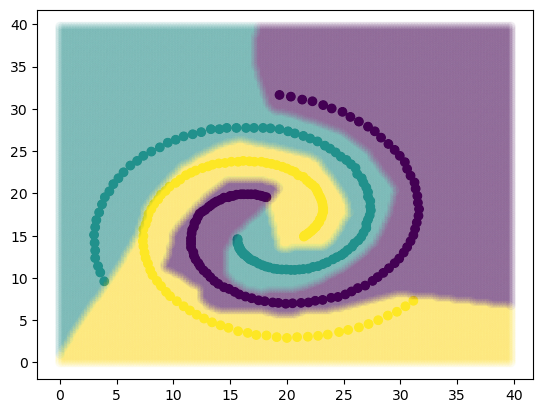

In [20]:
plt.scatter(x=data[:,0] , y=data[:,1] , c=data[:,2]);
plt.scatter(X_spiral_test[:,0] , X_spiral_test[:,1] , c = Y_spiral_predict , alpha = 0.05)
plt.show()

therefore as it can be seen the neural network is doing a nice job in a classification problem.